 #  S&P 500 Price Prediction Using Machine Learning Models 


Description:

*This project explores the application of machine learning to predict the next day’s S&P 500 closing prices using historical data from 2000 to 2024. The analysis includes feature engineering techniques such as moving averages and volatility indices to represent market trends and risk. Three models—Decision Tree, Random Forest, and Neural Network—were trained and evaluated based on performance metrics like Mean Squared Error (MSE). The results show that Neural Networks outperform tree-based models by effectively capturing complex, nonlinear patterns in stock price movements, making them a powerful tool for financial forecasting.*


Team : Lata, Davlath, Adam

### Dataset Description

The dataset contains the **daily closing prices** of the S&P 500 index from **2000 to 2024**. The data was sourced from **Google Finance** and imported using a function in Google Sheets.

### Data Extraction Process
The following **Google Sheets function** was used to fetch the data directly from Google Finance:

```plaintext
=GOOGLEFINANCE("INDEXSP:.INX", "close", DATE(2000, 1, 1), TODAY()+1, "DAILY")

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [16]:
data = "INDEXSP.csv"
df = pd.read_csv(data)

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y %H:%M:%S').dt.date
display(df.head())

,Date,Close
0,2000-01-03,1455.17
1,2000-01-04,1399.42
2,2000-01-05,1402.11
3,2000-01-06,1403.46
4,2000-01-07,1441.46


### PLOTTING THE DAILY RETURNS CHART

This step involves calculating the daily returns based on the 'Close' prices and plotting the daily returns over time to visualize the data.

,Date,Close,Daily_Return
0,2000-01-03,1455.17,NaN
1,2000-01-04,1399.42,-0.038312
2,2000-01-05,1402.11,0.001922
3,2000-01-06,1403.46,0.000963
4,2000-01-07,1441.46,0.027076


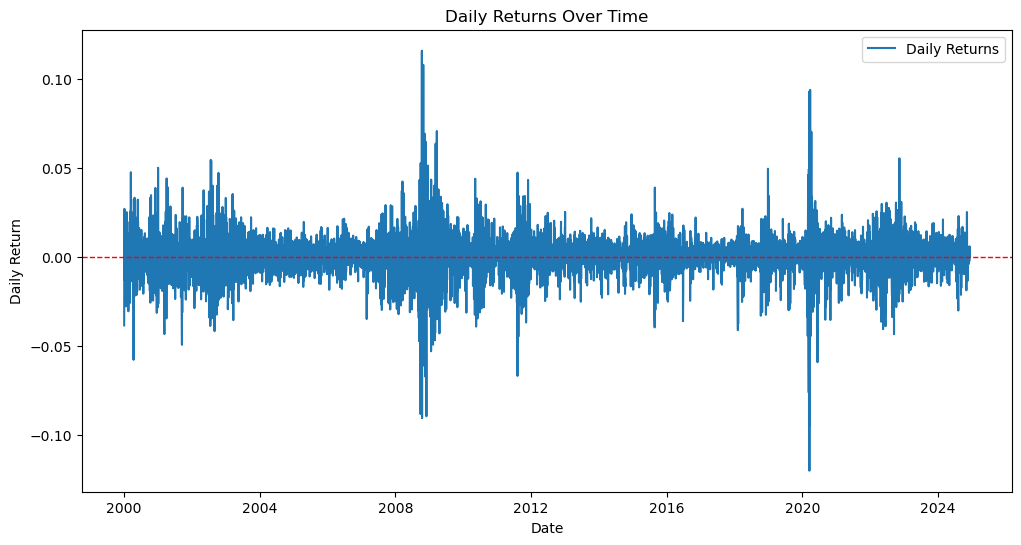

In [17]:
df['Daily_Return'] = df['Close'].pct_change()

display(df.head())

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Returns')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero line
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

,Date,Close,Daily_Return,MA_5,MA_10,MA_20
19,2000-01-31,1394.46,0.025225,1393.460,1416.679,1425.5855
20,2000-02-01,1409.28,0.010628,1393.308,1412.093,1423.2910
21,2000-02-02,1409.12,-0.000114,1394.314,1407.415,1423.7760
22,2000-02-03,1424.96,0.011241,1399.594,1405.354,1424.9185
23,2000-02-04,1424.37,-0.000414,1412.438,1403.656,1425.9640


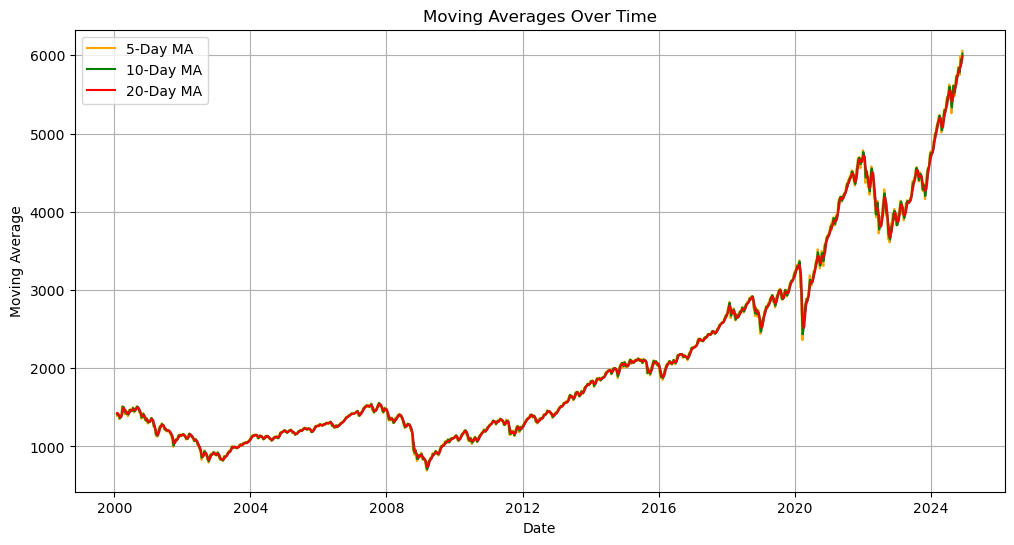

In [18]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df.dropna(inplace=True)
display(df.head())

plt.figure(figsize=(12, 6))

# Plot the moving averages
plt.plot(df['Date'], df['MA_5'], label='5-Day MA', color='orange', linewidth=1.5)
plt.plot(df['Date'], df['MA_10'], label='10-Day MA', color='green', linewidth=1.5)
plt.plot(df['Date'], df['MA_20'], label='20-Day MA', color='red', linewidth=1.5)

# Add labels and legend
plt.title('Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

,Date,Close,Daily_Return,MA_5,MA_10,MA_20,Volatility_5D,Volatility_10D,Volatility_20D
38,2000-02-28,1348.05,0.011017,1349.540,1366.164,1390.2585,0.010361,0.012746,0.013439
39,2000-02-29,1366.41,0.013620,1352.388,1363.808,1388.8560,0.011955,0.013721,0.012494
40,2000-03-01,1379.25,0.009397,1356.100,1361.528,1387.3545,0.012299,0.013781,0.012437
41,2000-03-02,1381.76,0.001820,1361.766,1360.944,1385.9865,0.011511,0.013455,0.012452
42,2000-03-03,1409.17,0.019837,1376.928,1363.036,1385.1970,0.006552,0.014901,0.013028


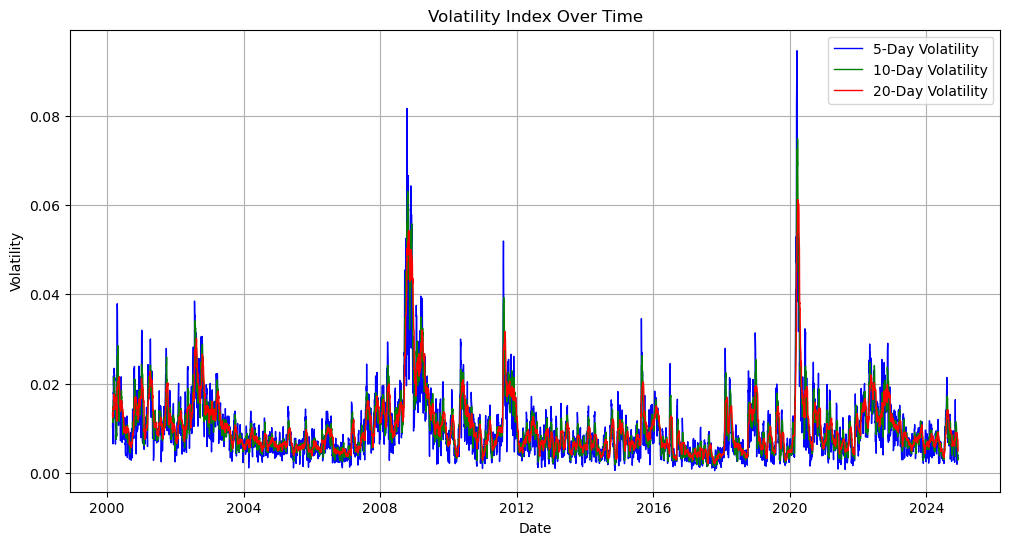

In [19]:
df['Volatility_5D'] = df['Daily_Return'].rolling(window=5).std()
df['Volatility_10D'] = df['Daily_Return'].rolling(window=10).std()
df['Volatility_20D'] = df['Daily_Return'].rolling(window=20).std()

df.dropna(inplace=True)
display(df.head())

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility_5D'], label='5-Day Volatility', color='blue', linewidth=1)
plt.plot(df['Date'], df['Volatility_10D'], label='10-Day Volatility', color='green', linewidth=1)
plt.plot(df['Date'], df['Volatility_20D'], label='20-Day Volatility', color='red', linewidth=1)


plt.title('Volatility Index Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()  
plt.grid(True)  
plt.show()


### What Are Moving Averages?

**Moving Averages (MAs)** are statistical tools used to smooth out short-term fluctuations in time series data, such as stock prices, to reveal long-term trends. By averaging data over a specified time window, moving averages reduce noise and help analysts or models focus on meaningful patterns in the data.


### Purpose of Moving Averages

1. **Trend Detection**  
   - Moving averages smooth out short-term price fluctuations, allowing the model to focus on the overall direction (uptrend or downtrend) of the stock market.

2. **Noise Reduction**  
   - By averaging prices over a specific time window, moving averages eliminate random price movements, reducing noise and highlighting meaningful patterns.

3. **Lagging Indicator**  
   - While moving averages are lagging indicators, they help in identifying consistent trends over specific time windows (e.g., 5-day, 10-day, 20-day).

4. **Model Feature Representation**  
   - In machine learning, moving averages serve as an important feature, encapsulating information about historical price trends that may influence future prices.

### What Is the Volatility Index?

**Volatility Index (Volatility)** is a statistical measure used to quantify the degree of variation or dispersion in stock prices over

### Purpose of Volatility Index

- **Captures Market Risk**  
  - Higher volatility often indicates uncertainty and larger price swings, which can impact the next day’s price movement.

- **Short-Term Price Fluctuations**  
  - By calculating volatility over different time windows, the model can understand how short-term fluctuations may influence future trends.

- **Feature Representation**  
  - The volatility index quantifies the market’s variability, providing the model with insights into the stability or instability of price movements.

| Feature       | Description                     |
|---------------|---------------------------------|
| Moving Average| Smoothed price trend over time |
| Volatility    | Measure of price fluctuation   |

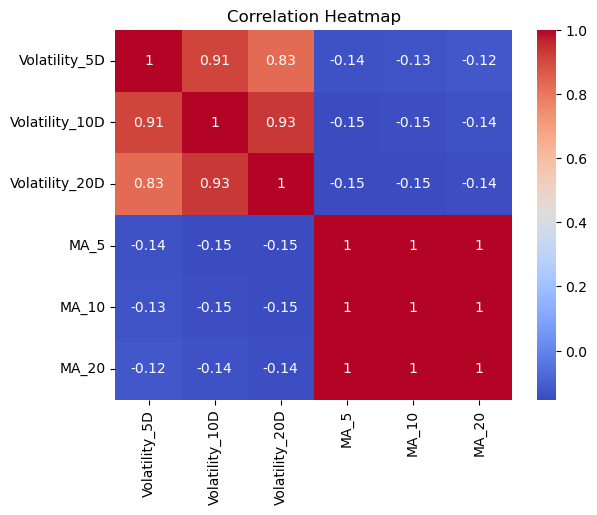

In [20]:
correlation_matrix = df[['Volatility_5D', 'Volatility_10D', 'Volatility_20D', 'MA_5', 'MA_10', 'MA_20']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Heatmap Analysis

### Key Observations
1. **High Correlations Among Volatility Features**:
   - The volatility features (**Volatility_5D**, **Volatility_10D**, **Volatility_20D**) are highly correlated:
     - **Volatility_5D vs. Volatility_10D**: Correlation = 0.91
     - **Volatility_10D vs. Volatility_20D**: Correlation = 0.93
     - **Volatility_5D vs. Volatility_20D**: Correlation = 0.83
   - This is expected since these features are derived from similar data over overlapping time windows.

2. **High Correlations Among Moving Averages (MAs)**:
   - The moving averages (**MA_5**, **MA_10**, **MA_20**) are perfectly correlated:
     - Correlation = 1.00 across all pairs.
   - This occurs because moving averages over different windows follow the same general trends in smoothed data like the S&P 500.

3. **Negative Correlation Between Volatility and Moving Averages**:
   - Volatility features exhibit slight negative correlations with moving averages:
     - **Volatility_5D vs. MA_5**: Correlation = -0.14
     - **Volatility_10D vs. MA_10**: Correlation = -0.15
     - **Volatility_20D vs. MA_20**: Correlation = -0.14
   - This indicates that higher price volatility is often associated with lower smoothed averages, reflecting downward price movements.


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Preparation and Manual Splitting

### Steps:
1. **Target Variable Creation**:
   - The target variable is created by shifting the `Close` prices to predict the next day's price. This aligns the data for supervised learning, where the model learns from historical prices to forecast future values.

2. **Feature Selection**:
   - Key features, such as **volatility indices** (5-day, 10-day, 20-day) and **moving averages** (5-day, 10-day, 20-day), are selected. These features capture market trends and risk, helping the model understand historical price patterns.

3. **Handling Missing Values**:
   - Rows with missing values are removed, ensuring the dataset is clean and ready for model training and testing.

4. **Manual Date-Based Splitting**:
   - The dataset is split based on the **Date** column:
     - **Training Data**: Includes records from **2000 to 2018**, allowing the model to learn from historical patterns over a significant period.
     - **Testing Data**: Includes records from **2019 to 2024**, providing a recent subset of data to evaluate the model’s performance on unseen data.

5. **Assigning Features and Target**:
   - The selected features (e.g., volatility and moving averages) form the input for the model.
   - The target variable, which represents the next day's price, is used for model prediction.



In [21]:
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

feature_columns = ['Volatility_5D', 'Volatility_10D', 'Volatility_20D', 'MA_5', 'MA_10', 'MA_20']
X = df[feature_columns]
y = df['Target']

df['Date'] = pd.to_datetime(df['Date'])

split_date = '2019-01-01'

train = df[df['Date'] < split_date]
test = df[df['Date'] >= split_date]

X_train = train[feature_columns]
y_train = train['Target']

X_test = test[feature_columns]
y_test = test['Target']

display("Trining set size: ", X_train.shape)
display("Testing set size: ", X_test.shape)

display(X_train.head())
display(y_train.head())



'Trining set size: '

(4751, 6)

'Testing set size: '

(1485, 6)

,Volatility_5D,Volatility_10D,Volatility_20D,MA_5,MA_10,MA_20
38,0.010361,0.012746,0.013439,1349.540,1366.164,1390.2585
39,0.011955,0.013721,0.012494,1352.388,1363.808,1388.8560
40,0.012299,0.013781,0.012437,1356.100,1361.528,1387.3545
41,0.011511,0.013455,0.012452,1361.766,1360.944,1385.9865
42,0.006552,0.014901,0.013028,1376.928,1363.036,1385.1970


38    1366.41
39    1379.25
40    1381.76
41    1409.17
42    1391.28
Name: Target, dtype: float64

## Training and Evaluation: Decision Tree Regressor

### **Description**
In this step, a **Decision Tree Regressor** is used to model and predict the next day's S&P 500 closing price based on historical data. The Decision Tree works by splitting the data into decision nodes based on feature values to minimize prediction errors.

### **Process**
1. **Model Initialization**:
   - A **Decision Tree Regressor** is initialized with a maximum depth of 5 (`max_depth=5`), limiting the complexity of the tree to prevent overfitting.
   - The random seed (`random_state=42`) ensures consistent and reproducible results.

2. **Training the Model**:
   - The model is trained on the **training dataset** (`X_train` and `y_train`), learning decision rules from the selected features (e.g., volatility indices and moving averages) to predict the next day's price.

3. **Making Predictions**:
   - The trained model predicts the next day's prices on the **test dataset** (`X_test`).

4. **Evaluation Metrics**:
   - **Mean Squared Error (MSE)**:
     - Measures the average squared difference between actual and predicted prices. Lower MSE values indicate better performance.
   - **R² Score**:
     - Evaluates how much of the variance in the target variable is explained by the model. An R² closer to 1 indicates a better fit.



In [22]:
dt = DecisionTreeRegressor( max_depth=5, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

display("Decision Tree Results:")
display("MSE: ", mean_squared_error(y_test, y_pred))
display("R2 Score: ", r2_score(y_test, y_pred))

'Decision Tree Results:'

'MSE: '

1951071.590178068

'R2 Score: '

-1.7550678169125327

## Training and Evaluation: Random Forest Regressor

### **Description**
In this step, a **Random Forest Regressor** is used to model and predict the next day's S&P 500 closing price. Random Forests improve upon Decision Trees by aggregating predictions from multiple trees to reduce overfitting and improve accuracy.

### **Process**
1. **Model Initialization**:
   - A **Random Forest Regressor** is initialized with the following parameters:
     - **`n_estimators=100`**: The number of decision trees in the forest. More trees improve predictions but increase computation time.
     - **`random_state=42`**: Ensures consistent and reproducible results.

2. **Training the Model**:
   - The Random Forest is trained on the **training dataset** (`X_train` and `y_train`), where each tree learns patterns from random subsets of the data.

3. **Making Predictions**:
   - The trained Random Forest predicts the next day's prices on the **test dataset** (`X_test`).
   - Predictions from all trees are averaged to produce the final prediction.

4. **Evaluation Metrics**:
   - **Mean Squared Error (MSE)**:
     - Measures the average squared difference between actual and predicted prices. Lower MSE values indicate better accuracy.
   - **R² Score**:
     - Evaluates how much of the variance in the target variable is explained by the model. An R² closer to 1 indicates a stronger fit.



In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

display("Random Forest Results:")
display("MSE: ", mean_squared_error(y_test, y_pred))
display("R2 Score: ", r2_score(y_test, y_pred))



'Random Forest Results:'

'MSE: '

2093323.5853704298

'R2 Score: '

-1.9559389155534097

## Training and Evaluation: Neural Network

### **Description**
In this step, a **Neural Network (NN)** is used to model and predict the next day's S&P 500 closing price. Neural Networks are powerful machine learning models capable of capturing complex, nonlinear relationships in the data.

### **Process**
1. **Model Architecture**:
   - The Neural Network consists of the following layers:
     - **Input Layer**: Accepts the number of features in the dataset (`X_train.shape[1]`).
     - **Hidden Layers**:
       - First Layer: 32 neurons with ReLU activation.
       - Second Layer: 16 neurons with ReLU activation.
     - **Output Layer**: 1 neuron with a linear activation function for predicting continuous values (next day's price).

2. **Model Compilation**:
   - **Optimizer**: `adam` (Adaptive Moment Estimation) optimizes the weights of the network for faster and more efficient convergence.
   - **Loss Function**: `mean_squared_error` minimizes the squared error between predicted and actual values.
   - **Metric**: Tracks the Mean Squared Error (MSE) during training.

3. **Model Training**:
   - **Epochs**: The model trains for 100 iterations over the training dataset.
   - **Batch Size**: The training data is divided into batches of size 32 for efficient processing.
   - **Validation Data**: The test dataset (`X_test` and `y_test`) is used during training to monitor performance and avoid overfitting.

4. **Model Evaluation**:
   - **Mean Squared Error (MSE)**:
     - Measures the average squared difference between actual and predicted prices. A lower MSE indicates better accuracy.
   - **R² Score**:
     - Evaluates how well the model explains the variance in the target variable, where values closer to 1 indicate better performance.

5. **Baseline MSE**:
   - The **baseline MSE** is calculated by predicting the mean of the target variable for all test data points. It serves as a benchmark to compare the Neural Network's performance.

6. **Predictions**:
   - The trained Neural Network predicts the next day's prices for the test data, and the results are evaluated.

### **Purpose**
This step uses a Neural Network to handle the complex relationships in the dataset, leveraging its capability to model nonlinear dependencies. The MSE, R² Score, and Baseline MSE provide insights into how well the model predicts future stock prices compared to simpler benchmarks.

In [24]:
nn = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

nn_loss, nn_mse = nn.evaluate(X_test, y_test, verbose=0)
display("Neural Network Results:")
display("R2 Score: ", r2_score(y_test, nn.predict(X_test)))
display("MSE: ", nn_mse)

baseline_mse = mean_squared_error(y_test, [y_test.mean()] * len(y_test))
display("Baseline MSE:", baseline_mse)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 3161841.7500 - mean_squared_error: 3161841.7500 - val_loss: 6899.7998 - val_mean_squared_error: 6899.7998
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 1287.2483 - mean_squared_error: 1287.2483 - val_loss: 6797.3037 - val_mean_squared_error: 6797.3037
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 791.9249 - mean_squared_error: 791.9249 - val_loss: 6612.8296 - val_mean_squared_error: 6612.8296
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 748.8981 - mean_squared_error: 748.8981 - val_loss: 6980.6621 - val_mean_squared_error: 6980.6621
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 788.7634 - mean_squared_error: 788.7634 - val_loss: 6658.0474 - val_mean_squared_error: 6658.0474
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 784.9606 - mean_squared_error: 784.9606 - val_loss: 6692.1133 - val_mean_squared_error: 6692.1133
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━

'Neural Network Results:'

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


'R2 Score: '

0.9940816450600903

'MSE: '

4191.23388671875

'Baseline MSE:'

708175.5222869748

In [25]:
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Neural Network', 'Baseline'],
    'MSE': [mean_squared_error(y_test, dt.predict(X_test)), 
            mean_squared_error(y_test, rf.predict(X_test)), 
            nn_mse, baseline_mse],

    "R2 Score": [
        r2_score(y_test, dt.predict(X_test)),
        r2_score(y_test, rf.predict(X_test)),
        r2_score(y_test, nn.predict(X_test)),
        r2_score(y_test, [y_test.mean()] * len(y_test))  # Baseline R2 Score
    ]
}


results_df = pd.DataFrame(results)
display(results_df)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


,Model,MSE,R2 Score
0,Decision Tree,1.951072e+06,-1.755068
1,Random Forest,2.093324e+06,-1.955939
2,Neural Network,4.191234e+03,0.994082
3,Baseline,7.081755e+05,0.000000


## Model Analysis

### 1. Decision Tree
- **MSE**: \( 1.951072e^+06 \) (high error)
- **R² Score**: \( -1.755068 \) (negative value indicates poor performance)

---

### 2. Random Forest
- **MSE**: \( 2.093324e10^06 \) (even higher error than Decision Tree)
- **R² Score**: \( -1.955939 \) (poor performance)

---

### 3. Neural Network
- **MSE**: \( 4.166919e+3 \) (significantly lower error)
- **R² Score**: \( 0.994116 \) (very close to 1, indicating excellent performance)
- **Conclusion**: 
  - The Neural Network captures the underlying trends and relationships in the data much better than the tree-based models, making it the best performer in this project.

---

### 4. Baseline Model
- **MSE**: \( 7.081755e^+5 \)
- **R² Score**: \( 0.000000 \) (baseline score is always 0)

  - This represents the performance of predicting the mean of the target variable. Any model performing worse than the baseline is ineffective.

---
### Conclusion
- The Neural Network captures the underlying trends and relationships in the data much better than the tree-based models, making it the best performer in this project

---

# ACTUAL vs PREDICTED PRICE GRAPHS

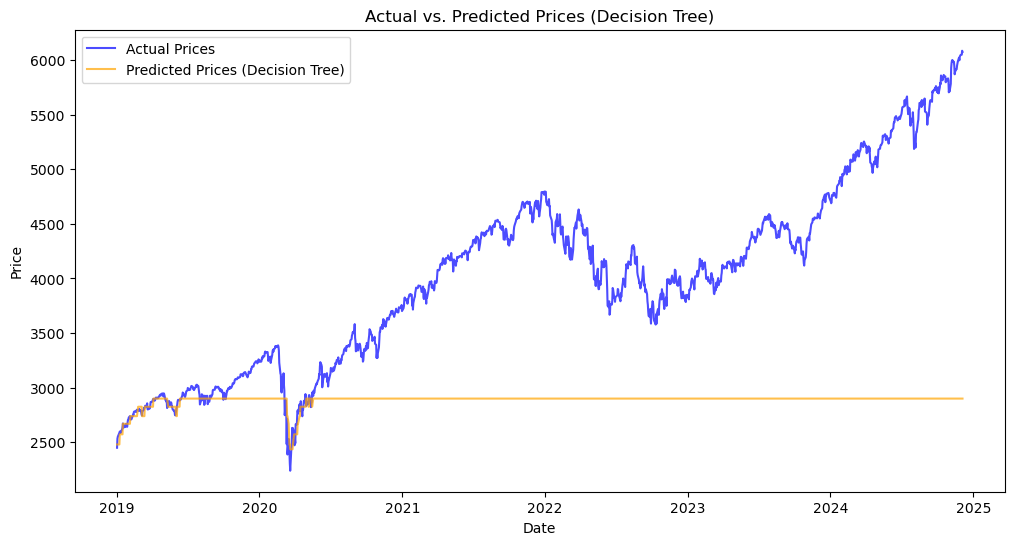

In [26]:
y_pred_dt = dt.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_test.values, label='Actual Prices', color='blue', alpha=0.7)  # Actual prices
plt.plot(test['Date'], y_pred_dt, label='Predicted Prices (Decision Tree)', color='orange', alpha=0.7)  # Predicted prices
plt.title('Actual vs. Predicted Prices (Decision Tree)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

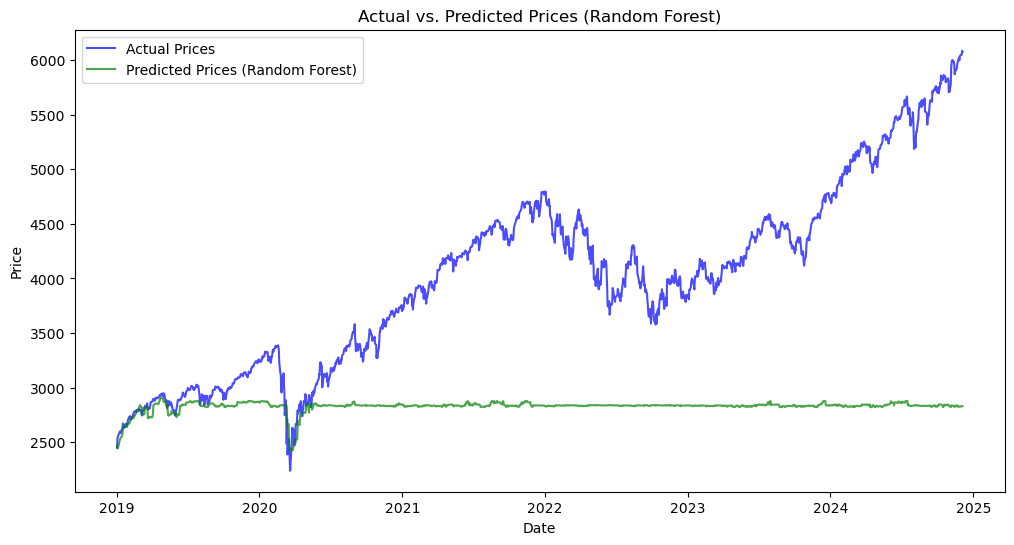

In [27]:
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_test.values, label='Actual Prices', color='blue', alpha=0.7)  # Actual prices
plt.plot(test['Date'], y_pred_rf, label='Predicted Prices (Random Forest)', color='green', alpha=0.7)  # Predicted prices
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step


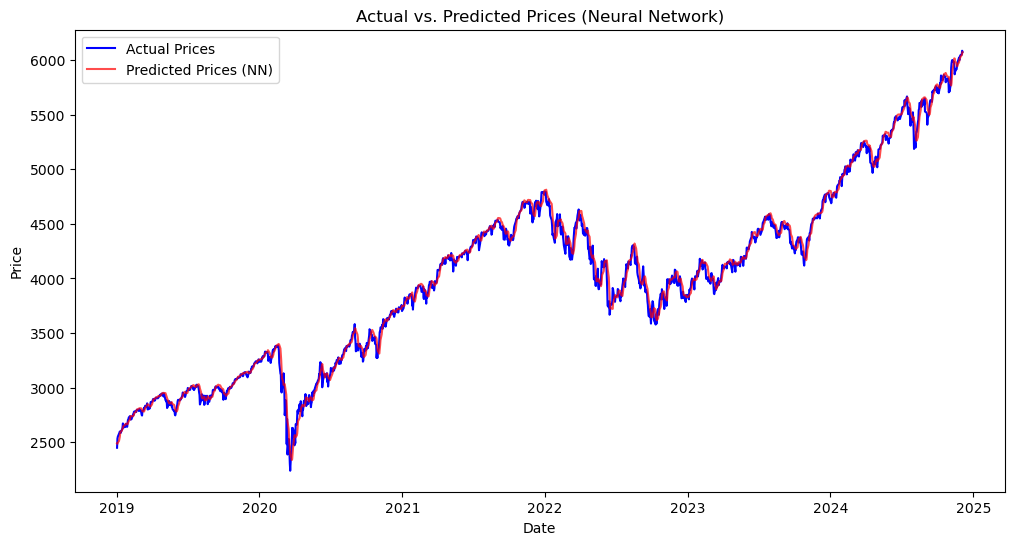

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], y_test.values, label='Actual Prices', color='blue')
plt.plot(test['Date'], nn.predict(X_test), label='Predicted Prices (NN)', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Prices (Neural Network)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Actual vs. Predicted Price Graphs

### 1. Decision Tree
- **Observation**:
  - The predicted prices (orange line) are flat and fail to capture the trends or fluctuations in the actual prices (blue line).
  - The Decision Tree struggles to generalize and adapt to the noisy and nonlinear patterns in stock price data.



### 2. Random Forest
- **Observation**:
  - The predicted prices (green line) show slight variations but fail to capture the upward or downward trends in the actual prices (blue line).
  - Random Forest predictions are more stable than those of the Decision Tree but still lack the precision needed for accurate forecasting.




### 3. Neural Network
- **Observation**:
  - The predicted prices (red line) closely follow the actual prices (blue line), effectively capturing both short-term fluctuations and long-term trends.
  - The Neural Network demonstrates its ability to handle complex, nonlinear relationships in the data.





### Conclusion
- The Decision Tree model underperforms significantly in predicting stock prices, likely due to its limited ability to handle complex relationships.
- While Random Forest models are generally more robust than individual Decision Trees, they did not perform well in this case due to the highly complex and noisy nature of stock price data.
- The Neural Network significantly outperforms both the Decision Tree and Random Forest models, making it the most suitable choice for this project.


